# ¡Llena ese carrito!

## Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución Paso 1

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.



<div class="alert alert-block alert-info">

**Macarena :** 
Mi plan de solución para obtener la descripción de los datos es empezar importando las librerías necesarias para la correcta ejecución del proyecto y como segundo paso se leerán los 5 conjuntos de datos entregados y se utilizaran las funciones `info` y `head` para tener un mejor entendimiento de los datos que componen cada tabla y observar el tipo de dato que se le ha asignado automáticamente a cada columna.
    
    
</div>

In [1]:
import pandas as pd # importar librerías
import matplotlib.pyplot as plt

In [2]:
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv',sep=';')# leer conjuntos de datos en los DataFrames
products = pd.read_csv('/datasets/products.csv',sep=';')
order_products = pd.read_csv('/datasets/order_products.csv',sep=';')
aisles = pd.read_csv('/datasets/aisles.csv',sep=';')
departments = pd.read_csv('/datasets/departments.csv',sep=';')


In [3]:

instacart_orders.info()# mostrar información del DataFrame
print(instacart_orders.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

In [4]:
products.info()# mostrar información del DataFrame
print(products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [5]:
order_products.info(null_counts=True)# mostrar información del DataFrame
print(order_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


In [6]:
aisles.info()# mostrar información del DataFrame
print(aisles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [7]:
departments.info()# mostrar información del DataFrame
print(departments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


## Conclusiones Paso 1

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


<div class="alert alert-block alert-info">

**Macarena :** 
Al leer los conjuntos de datos pudimos notar que el separador utilizado en todas las tablas es ";" por lo que se tuvieron que ajustar los parámetros delimitadores de cada tabla en la función `read` para generar su correcta visualización.
    
</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución Paso 2

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

<div class="alert alert-block alert-info">

**Macarena :** 
Con respecto al preprocesamiento de los datos, con las tablas resumen que se generaron en el primer paso ya podemos observar que todas las columnas ID de las diferentes tablas son tipo de dato integer o número entero por lo que no se deben realizar cambios de tipos de datos para estas.




La identificación y posibles cambios a realizar por valores ausentes y posibles duplicados, serán explicados en los puntos 5 y 6.
   
    
</div>

### Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).


#### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(instacart_orders.duplicated().sum())
print()
duplicates = instacart_orders[instacart_orders["order_id"].duplicated()]
print(duplicates)


15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48        

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

<div class="alert alert-block alert-info">

**Macarena :** 
Efectivamente se tienen 15 filas duplicadas en el modelo, las cuales todas tienen en común que la orden fue realizada el día miércoles a las 2 a.m.
    
</div>

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(instacart_orders[(instacart_orders["order_dow"] == 3) & (instacart_orders["order_hour_of_day"] == 2)].sort_values(by="order_number"))



        order_id  user_id  order_number  order_dow  order_hour_of_day  \
324868   2232988    82565             1          3                  2   
200059   1782114   106752             1          3                  2   
359625    332561   201301             1          3                  2   
266232   1782114   106752             1          3                  2   
262169   1099720    57529             1          3                  2   
...          ...      ...           ...        ...                ...   
109466    851025   168387            54          3                  2   
468324    222962    54979            59          3                  2   
273805   1112182   202304            84          3                  2   
164581   1112182   202304            84          3                  2   
255538    577527     5253            96          3                  2   

        days_since_prior_order  
324868                     NaN  
200059                     NaN  
359625                  

¿Qué sugiere este resultado?

<div class="alert alert-block alert-info">

**Macarena :** 
De las 121 filas que tienen la hora y día analizados en común hay 15 repetidas, de las cuales incluso se han podido visualizar en la celda de arriba, por ejemplo, las filas con los índices 164581 y 273805 son idénticas.
    
</div>

In [10]:
# Elimina los pedidos duplicados
instacart_orders = instacart_orders.drop_duplicates()

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(instacart_orders.duplicated().sum())


0


In [12]:
# Vuelve a verificar si hay IDs duplicados de pedidos
print(instacart_orders["order_id"].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

<div class="alert alert-block alert-info">

**Macarena :** 
Al percatarme de que existían filas duplicadas, primero las visualice para ver si tenían datos en común que pudieran ayudarme a entender por qué se generaron en primer lugar. Al notar que el elemento en común fue la hora y el día podemos empezar a investigar si hubo un problema específico en el programa durante ese periodo de tiempo determinado o si hubo posibles efectos externos(ej.:cortes de electricidad a nivel ciudad, tormenta, hackeo masivo, etc..) que pudieron haber alterado su funcionamiento. Esta información nos puede ser útil para tomar medidas de precaución para que no vuelvan a ocurrir estos problemas. 
    

    

    

Ya que las filas duplicadas podían causarnos problemas en futuros análisis de los datos se decidió removerlas del Dataframe.
    
</div>

#### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().sum()


0

In [14]:
# Verifica si hay IDs duplicadas de productos
products["product_id"].duplicated().sum()

0

In [15]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products["product_name"] = products["product_name"].str.upper()

print(products["product_name"].duplicated().sum())



1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes

print(products[~(products["product_name"].isna()) & (products["product_name"].duplicated())]["product_name"].count())



104


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-info">

**Macarena :** 
Con respecto al Dataframe products, si bien notamos que los IDs de productos no tienen duplicados, encontramos que existen 1361 valores duplicados en product_name, no obstante, por el resumen de la tabla que generamos al principio del informe sabemos que la columna product_name es la única que contiene valores ausentes, por lo que al buscar duplicados que no fueran productos faltantes se obtuvo un total final de 104 nombres de productos duplicados.

    

En mi opinión, yo no borraría estas filas, ya que ya sabemos que la columna product_id está compuesta solo por valores únicos, por lo que ya se puede utilizar como llave primaria de unión con otras tablas, y los duplicados encontrados no generarían mayor problema, además existe la posibilidad de que esos duplicados efectivamente hagan referencia al mismo producto, pero los ID sean diferentes por diversas razones, por ejemplo, podrían ir destinados a canales de ventas diferenciados o que uno de los ID se haya dado de baja y el otro siga activo, por lo que teniendo los dos se obtiene data histórica más completa.
   
    
</div>

#### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().sum()

0

In [18]:
# Revisa si hay IDs duplicadas de productos
print(departments["department_id"].duplicated().sum())
print()

print(departments.nunique())

0

department_id    21
department       21
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-info">

**Macarena :** 
El Dataframe departments no tienen filas duplicadas y se observa que ambas columnas están compuestas por valores únicos.
   
    
</div>

#### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

0

In [20]:
# Revisa si hay IDs duplicadas de productos
print(aisles["aisle_id"].duplicated().sum())
print()

print(aisles.nunique())

0

aisle_id    134
aisle       134
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-info">

**Macarena :** 
El Dataframe aisles no tienen filas duplicadas y se observa que ambas columnas están compuestas por valores únicos. 
    
</div>

#### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()


0

In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products["order_id"].duplicated().sum())
print()

print(order_products.nunique())

4094961

order_id             450046
product_id            45573
add_to_cart_order        64
reordered                 2
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-info">

**Macarena :** 
El Dataframe order_products no tiene filas duplicadas, sin embargo, si busco duplicados por columnas, en todas se obtendrán valores duplicados. Esto se debe a que esta tabla nos muestra la venta de cada producto de cada orden, por lo que está compuesta solo por columnas sin valores únicos. Esto no se debe considerar un error, ya que las otras tablas como products e instacart_order pueden generar relaciones de una a muchos con esta tabla.

    
</div>

### Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

#### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products["product_name"].isna().sum())

1258


Describe brevemente cuáles son tus hallazgos.

<div class="alert alert-block alert-info">

**Macarena :** 
Estos son los valores ausentes que se comentaron en el punto 5.2 los cuales componen actualmente parte de los duplicados de la columna "product_name".
    

    
</div>

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(products[(products["product_name"].isna()) & (products["aisle_id"] == 100)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

<div class="alert alert-block alert-info">

**Macarena :** 
Efectivamente todos los 1258 productos ausentes están relacionados con el pasillo con ID 100.
    

    
</div>

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(products[(products["product_name"].isna()) & (products["department_id"] == 21)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

<div class="alert alert-block alert-info">

**Macarena :** 
Efectivamente todos los 1258 productos ausentes están relacionados con el departamento con ID 21.
    
</div>

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(products[(products["aisle_id"] == 100) & (products["department_id"] == 21)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

<div class="alert alert-block alert-info">

**Macarena :** 
Por ende cumple ambas condiciones y siguen mostrándose 1258 filas. Además, ahora sabemos que todas las filas con la combinación de department_id 21 y aisle_id 100 solo están compuestas por filas con nombres de productos ausentes.
    
</div>

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products["product_name"] = products["product_name"].fillna('Unknown')

products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-info">

**Macarena :** 
Se realiza el cambio de nombres ausentes con 'Unknown'. Cabe destacar que esto no soluciona el problema de duplicados, pero ya no se tienen valores ausentes en el Dataframe.
    
</div>

#### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(instacart_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
instacart_orders.info()
print(instacart_orders[instacart_orders["days_since_prior_order"].isna()].sort_values(by="user_id"))
print(instacart_orders[instacart_orders["days_since_prior_order"].isna()].sort_values(by="order_number"))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
237015   2168274        2             1          2                 11   
14793    2086598        6             1          5                 18   
394637   2618231       13             1          6                 12   
20168    2514324       15             1          5                 13   
91566     947722       20             1   

Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-info">

**Macarena :** 
Se visualiza con las funciones en el punto 5.2.2 que solo la columna "days_since_prior_order" contiene valores ausentes. Se indaga la razón de esto filtrando las filas con los valores ausentes, ordenándolas por user_id y mostrándolas con `print`. Al visualizar los datos podemos notar que la columna order_number tienen un 1 como valor y nos aseguramos de que esto esté ocurriendo en toda la columna usando nuevamente `print` pero ahora ordenando con order_number. Esto nos indica que los valores ausentes se crean cuando un usuario realiza su primer pedido, por lo que no existen días previos a un pedido anterior inexistente.
    
</div>

#### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
print(order_products.isna().sum())
print()
order_products.info(null_counts=True)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products['add_to_cart_order'].min(), order_products['add_to_cart_order'].max())



1.0 64.0


Describe brevemente cuáles son tus hallazgos.

<div class="alert alert-block alert-info">

**Macarena :** 
Se visualiza que solo la columna "add_to_cart_order" contiene valores ausentes, los cuales representan menos del 1% del total de valores que componen la misma. También sabemos que los valores que contiene esta columna van del 1 al 64, por lo que se infiere que las compras más chicas se componen de solo un producto mientras que la compra (order_id) más grande está compuesta por 64 productos (generando 64 filas de datos).
    
</div>

In [38]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_with_null_values = order_products[(order_products['add_to_cart_order'].isna())]

In [39]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
id_unique = order_with_null_values["order_id"].unique()

print(order_products[order_products['order_id'].isin(id_unique)].groupby("order_id")["product_id"].count().sort_values(ascending=False))




order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
888470      65
1598369     65
747668      65
1677118     65
9310        65
Name: product_id, Length: 70, dtype: int64


Describe brevemente cuáles son tus hallazgos.

<div class="alert alert-block alert-info">

**Macarena :** 
Agrupando las 836 filas con valores ausentes con respecto a su order_id se generaron 70 agrupaciones de IDs únicos, los cuales varían de contener de 65 a 127 filas(productos), todas las órdenes que contienen filas con valores ausentes tienen más de 64 productos, en comparación, las órdenes que no tienen valores ausentes solo presentan un máximo de 64 filas, lo que nos da a inferir que cada vez que una orden llega al producto 65 en adelante, este toma un valor nulo en la columna add_to_cart_order.
    
</div>

In [40]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)
order_products.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-info">

**Macarena :** 
Al remplazar los valores ausentes con 999 nos queda un Dataframe completo, sin embargo, aún queda en incertidumbre el porqué se genera este error, podría ser por limitaciones de almacenamiento en el sistema o algo parecido, por lo que se recomendaría revisar el problema con la fuente de los data frames para buscar una mejor solución futura, ya que, si bien ponerles un número muy alejado a la realidad hace más fácil la diferenciación de estas filas, si queremos la dispersión de los datos, podría causar cierta confusión para personas que trabajen después con el Dataframe. Con respecto al cambio de tipo de datos, lo considero acertado, ya que los valores de la columna representan el orden de los productos en ser seleccionados por lo que no debería estar compuesto por decimales.

    
</div>

## Conclusiones Paso 2 

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


<div class="alert alert-block alert-info">

**Macarena :** 
El proceso de preprocesamiento realizado sobre los cinco dataframes es fundamental para preparación de los datos. La detección y eliminación de valores duplicados en el dataframe instacart_orders resolvió problemas potenciales por valores repetidos, que parecían originarse en pedidos realizados en un intervalo específico del día. En cuanto a los valores ausentes, se completaron adecuadamente en los dataframes products y order_products. Estas prácticas asegura que los conjuntos de datos estén limpios y listos para un análisis más profundo, minimizando los riesgos de inconsistencias y mejorando la integridad de resultados posteriores.

    
</div>

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

## Análisis Paso 3

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [41]:
print(instacart_orders['order_hour_of_day'].min(), instacart_orders['order_hour_of_day'].max(),instacart_orders['order_hour_of_day'].mean())

0 23 13.447034358349063


In [42]:
print(instacart_orders['order_dow'].min(), instacart_orders['order_dow'].max(),instacart_orders['order_dow'].mean())

0 6 2.775050526983915


Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">

**Macarena :** 
Los valores son razonables, ya que se contienen las oscilaciones correctas con respecto a la cantidad de horas que componen un día y la cantidad de días que componen una semana, ademas de tener tendencias centrales dentro de los rango.

    
</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

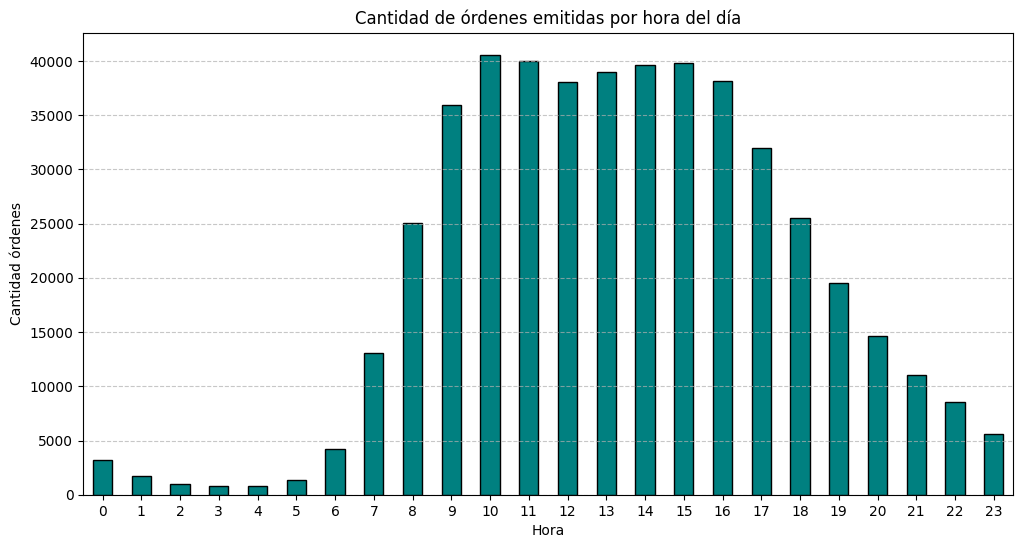

In [43]:

instacart_orders.groupby("order_hour_of_day")["order_id"].count().plot(kind="bar", title='Cantidad de órdenes emitidas por hora del día',
        xlabel='Hora',
        ylabel='Cantidad órdenes',
        rot=360,
        figsize=(12, 6),
        color='teal', 
        edgecolor='black'
                                                                 
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">

**Macarena :** 
    
La visualización muestra que la actividad de pedidos varía considerablemente a lo largo del día, generando la mayor frecuencia de órdenes entre las 10 am y las 4 pm. Este análisis proporciona una visión valiosa sobre los períodos de mayor y menor demanda, lo que puede ser crucial para la generación de estrategias de venta de la compañía.
    
</div>



### [A3] ¿Qué día de la semana compran víveres las personas?

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_id, dtype: int64


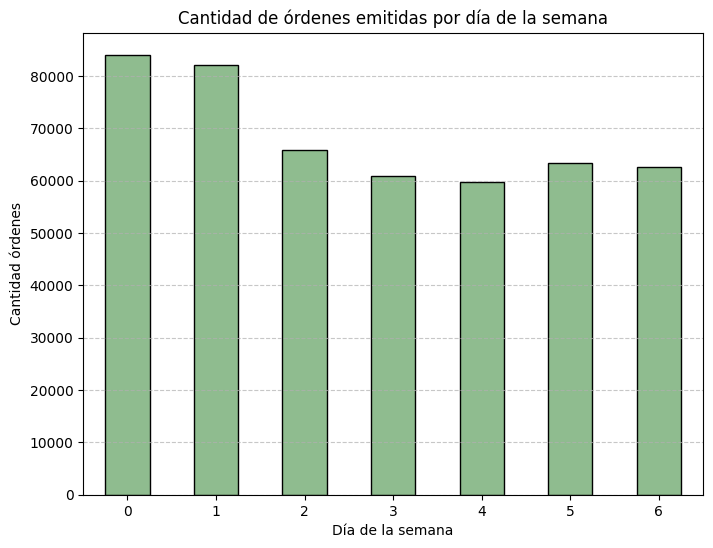

In [44]:
print(instacart_orders.groupby("order_dow")["order_id"].count())


instacart_orders.groupby("order_dow")["order_id"].count().plot(kind="bar", title='Cantidad de órdenes emitidas por día de la semana',
        xlabel='Día de la semana',
        ylabel='Cantidad órdenes',
        rot=360,
        figsize=(8, 6),
        color='darkseagreen', 
        edgecolor='black'
                                                                 
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">

**Macarena :** 
    
La visualización destaca que el volumen de órdenes varía significativamente entre los días, con un notable incremento durante el inicio y el fin de la semana. En otras palabras, los datos muestran que el lunes y el domingo son los días con mayor número de órdenes, mientras que el miércoles y el jueves, días que representan la mitad de la semana, tienen las actividades más bajas. La información que proporciona este análisis puede ser útil para el ajuste de estrategias logísticas, optimizando así la capacidad de respuesta a las fluctuaciones en la demanda de los clientes.
    
</div>



### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

min y max de la variable son: 0.0 30.0

tipo de dato de la variable: float64



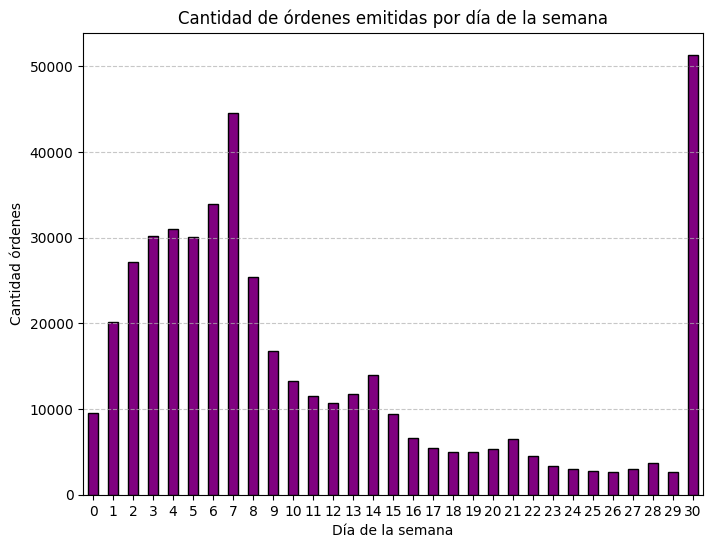

In [45]:
print("min y max de la variable son:",instacart_orders['days_since_prior_order'].min(), instacart_orders['days_since_prior_order'].max())
print()

print("tipo de dato de la variable:",instacart_orders["days_since_prior_order"].dtypes)
print()
instacart_orders_filtered = instacart_orders[~instacart_orders["days_since_prior_order"].isna()].astype(int)

instacart_orders_filtered.groupby("days_since_prior_order")["order_id"].count().plot(kind="bar", title='Cantidad de órdenes emitidas por día de la semana',
        xlabel='Día de la semana',
        ylabel='Cantidad órdenes',
        rot=360,
        figsize=(8, 6),
        color='purple', 
        edgecolor='black'
                                                                 
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">

**Macarena :** 
    
El gráfico de barras asociado muestra cómo se distribuyen las órdenes en función del número de días desde el último pedido. La mayoría de las órdenes se concentran en los intervalos más cortos, sugiriendo que los usuarios tienden a realizar compras con una frecuencia relativamente alta, siendo la muestra más alta entre los primeros días el día 7, exactamente una semana después del pedido anterior. Posterior al peak, la frecuencia empieza a disminuir con el paso de los días, aunque se observa que al cumplirse una semana se genera una pequeña alza (día 14, día 21 y día 28), también se observa que la muestra real más alta se ocasiona el día 30, lo que sería un comportamiento bastante inusual considerando que las muestras tienden a la baja después de la semana de espera. Para este caso buscaría más información respecto a la fuente de la base, ya que puede ser que las respuestas estuvieran delimitadas hasta los 30 días, por ende la muestre que está abarcada en el 30 realmente representaría a las personas que no han comprado hace un mes o más.
    
</div>



# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [46]:
instacart_wed =instacart_orders[instacart_orders["order_dow"] == 3] #se generan dos sub conjuntos de datos filtrados por el día de compra
instacart_sat =instacart_orders[instacart_orders["order_dow"] == 6]

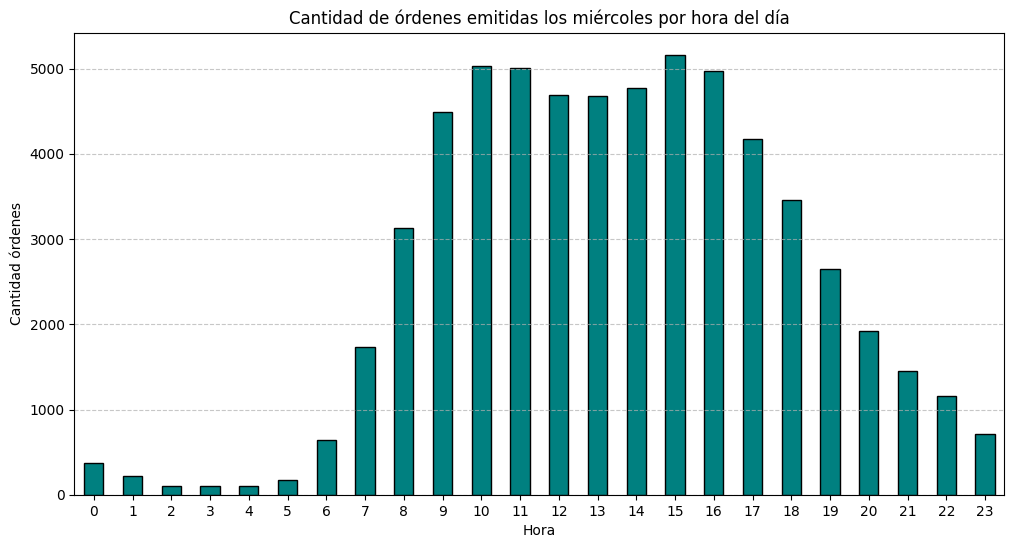

In [47]:
instacart_wed.groupby("order_hour_of_day")["order_id"].count().plot(kind="bar", title='Cantidad de órdenes emitidas los miércoles por hora del día',
        xlabel='Hora',
        ylabel='Cantidad órdenes',
        rot=360,
        figsize=(12, 6),
        color='teal', 
        edgecolor='black'
                                                                 
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


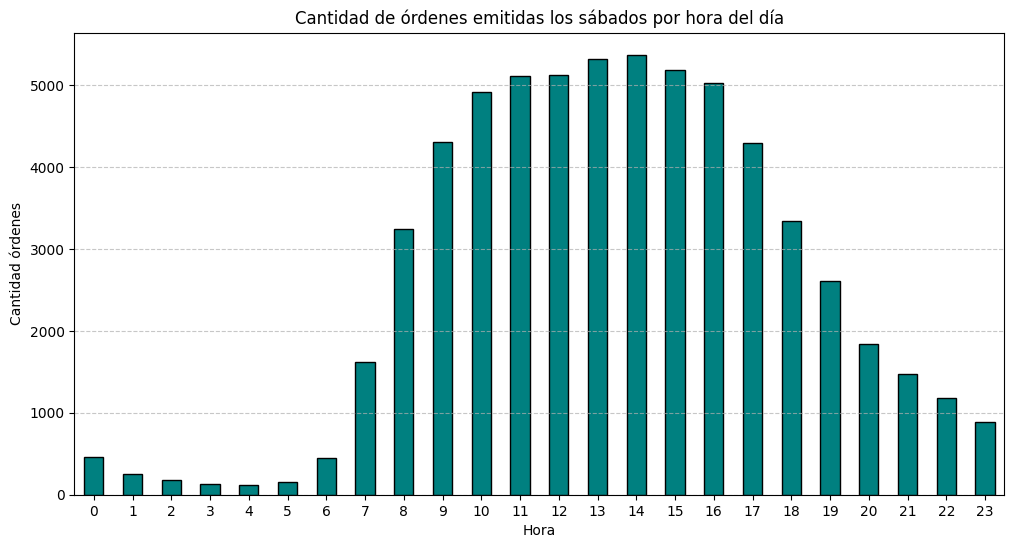

In [48]:
instacart_sat.groupby("order_hour_of_day")["order_id"].count().plot(kind="bar", title='Cantidad de órdenes emitidas los sábados por hora del día',
        xlabel='Hora',
        ylabel='Cantidad órdenes',
        rot=360,
        figsize=(12, 6),
        color='teal', 
        edgecolor='black'
                                                                 
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


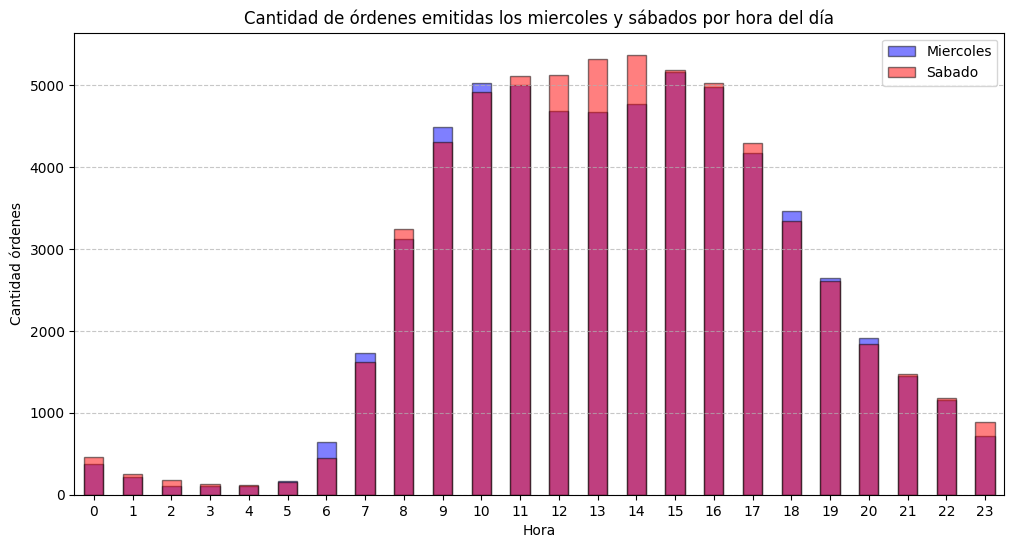

In [49]:
instacart_wed.groupby("order_hour_of_day")["order_id"].count().plot(kind="bar",
        xlabel='Hora',
        ylabel='Cantidad órdenes',
        rot=360,
        figsize=(12, 6),
        color='blue', 
        edgecolor='black',  alpha=0.5
                                                                 
)


instacart_sat.groupby("order_hour_of_day")["order_id"].count().plot(kind="bar",
        xlabel='Hora',
        ylabel='Cantidad órdenes',
        rot=360,
        figsize=(12, 6),
        color='red', 
        edgecolor='black', alpha=0.5
                                                                 
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Cantidad de órdenes emitidas los miercoles y sábados por hora del día")
plt.legend(["Miercoles", "Sabado"])
plt.show()



Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">

**Macarena :** 
    
Al comparar las órdenes realizadas los miércoles y sábados en función de la hora del día, a simple vista no se observan muchas diferencias notables en los patrones de compra.
Tanto para los miércoles como para los sábados, el gráfico muestra que la cantidad de órdenes tiende a concentrarse entre horarios cercanos al medio día y horas de la tarde. Lo que más las diferencias es que los miércoles muestran que dentro de los horarios más frecuentes mencionados hay dos rangos que se alzan en las preferencias, de 10 a 11 y de 15 a 16, mientras que en los sábados se visualiza solo un rango con un peak de frecuencia, el cual ocurre de 13 a 15.

Estas diferencias reflejan cómo los patrones de compra pueden variar entre días laborables y fines de semana, lo cual es crucial para optimizar los tiempos de oferta y promociones según el día.
    
</div>





### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [50]:
instacart_user = instacart_orders["user_id"].value_counts().reset_index()
instacart_user.columns =["user_id", "n_order"]
print(instacart_user)

        user_id  n_order
0        149605       28
1        193164       26
2         78375       25
3        148162       24
4         66664       24
...         ...      ...
157432   166116        1
157433    63564        1
157434   170214        1
157435    51274        1
157436     2047        1

[157437 rows x 2 columns]


n_order
1     55357
2     36508
3     21547
4     13498
5      8777
6      6012
7      4240
8      3019
9      2152
10     1645
11     1308
12      947
13      703
14      512
15      437
16      263
17      184
18      121
19       85
20       52
21       22
22       23
23       19
24        3
25        1
26        1
28        1
Name: user_id, dtype: int64


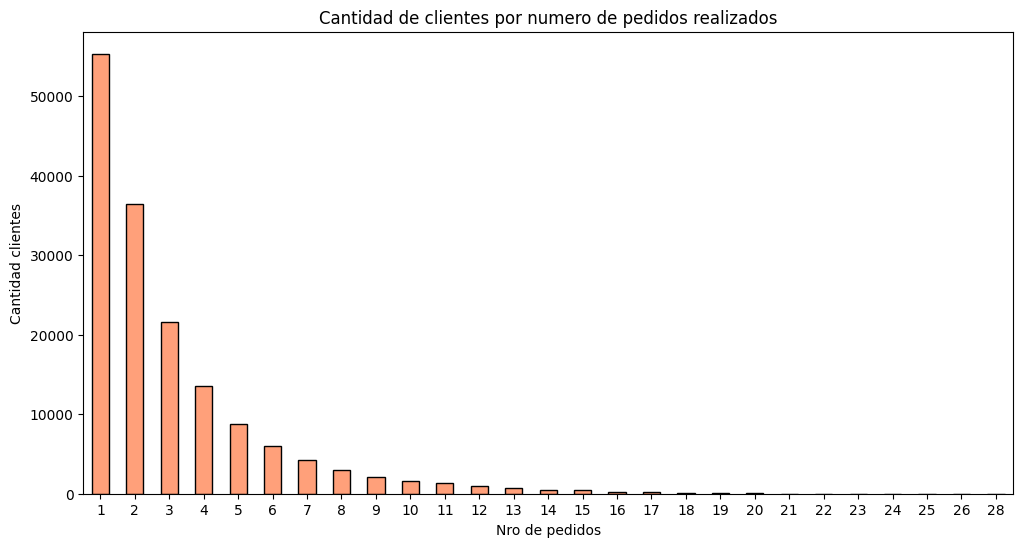

In [51]:
print(instacart_user.groupby("n_order")["user_id"].count())
instacart_user.groupby("n_order")["user_id"].count().plot(kind='bar', title='Cantidad de clientes por numero de pedidos realizados',
        xlabel='Nro de pedidos',
        ylabel='Cantidad clientes',
        rot=360,
        figsize=(12, 6),
        color='lightsalmon', 
        edgecolor='black'
                                                                 
)
plt.show()


Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">

**Macarena :** 
    
Al observar el gráfico de barras, se destaca que la mayoría de los clientes realizan solo un pedido(55.357 clientes) y que a medida que aumenta el número de pedidos, el número de clientes disminuye significativamente (correlación negativa). Se podría decir que la mayoría de los clientes son ocasionales, por la alta concentración de pedidos en la categoría de un solo pedido. Esta información es valiosa para posibles estrategias de fidelización, centradas en la conversión de estos usuarios ocasionales a compradores activos.

    
</div>





### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [52]:
product_merged = order_products.merge(products, on="product_id")
print(product_merged.head())
product_merged.info()

   order_id  product_id  add_to_cart_order  reordered  \
0   2141543       11440                 17          0   
1    147172       11440                  7          1   
2   3341719       11440                  4          1   
3   1938779       11440                  8          1   
4   1728338       11440                 23          0   

                     product_name  aisle_id  department_id  
0  CHICKEN BREAST TENDERS BREADED       129              1  
1  CHICKEN BREAST TENDERS BREADED       129              1  
2  CHICKEN BREAST TENDERS BREADED       129              1  
3  CHICKEN BREAST TENDERS BREADED       129              1  
4  CHICKEN BREAST TENDERS BREADED       129              1  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4545007 entries, 0 to 4545006
Data columns (total 7 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           int64 
 1   product_id         int64 
 2   add_to_cart_order  int64 
 3   reordered          

los 20 productos que se piden con mayor frecuencia son:

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATO

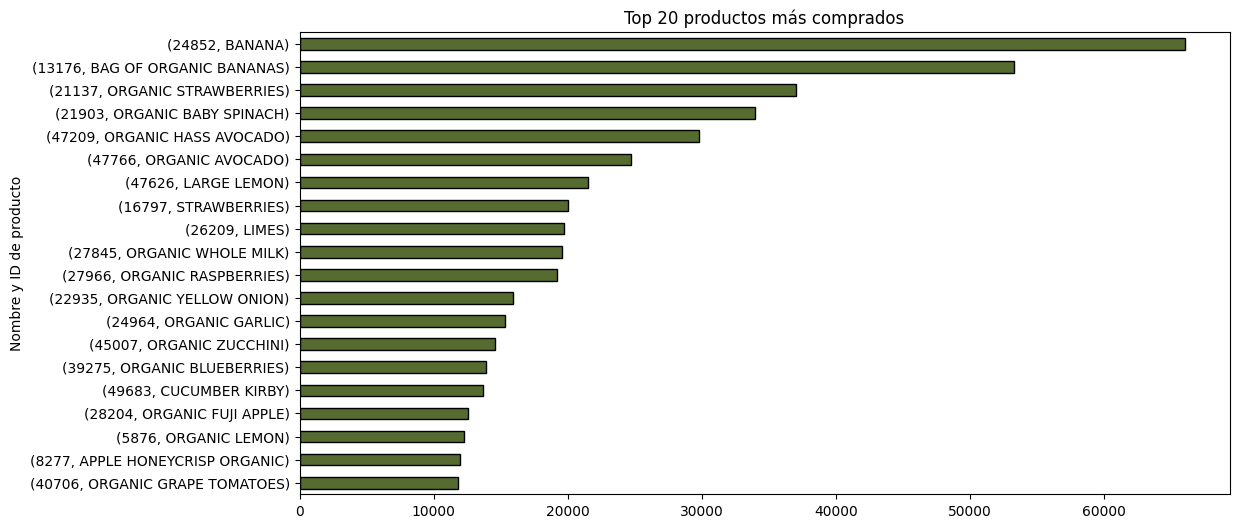

In [53]:

grp = product_merged.groupby(['product_id', 'product_name'])
product_ranking = grp["order_id"].count().sort_values(ascending=False)
print("los 20 productos que se piden con mayor frecuencia son:")
print()
print(product_ranking.head(20))
top_20 = product_ranking.head(20)
top_20.sort_values().plot(kind='barh', title='Top 20 productos más comprados', x="product_name",
        xlabel='Nombre y ID de producto',
        rot=0,
        figsize=(12, 6),
        color='darkolivegreen', 
        edgecolor='black'
                                                                 
)
plt.show()


Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">

**Macarena :** 
    
Los resultados sobre las preferencias de los consumidores nos indican una fuerte inclinación hacia frutas y verduras, especialmente con los orgánicos y con las bananas. Esta información puede ser útil para ajustar las estrategias de inventario y mkt.
    
</div>


# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

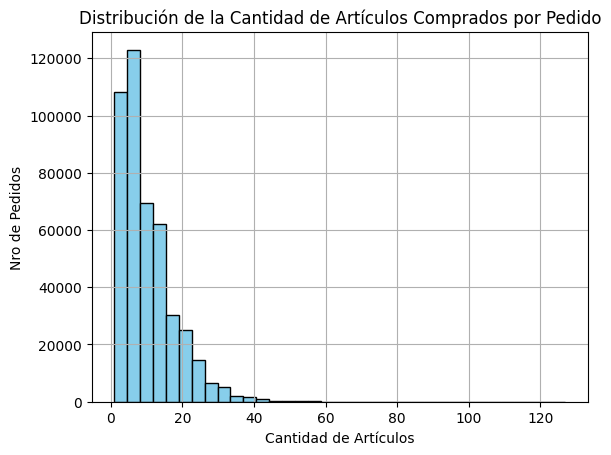

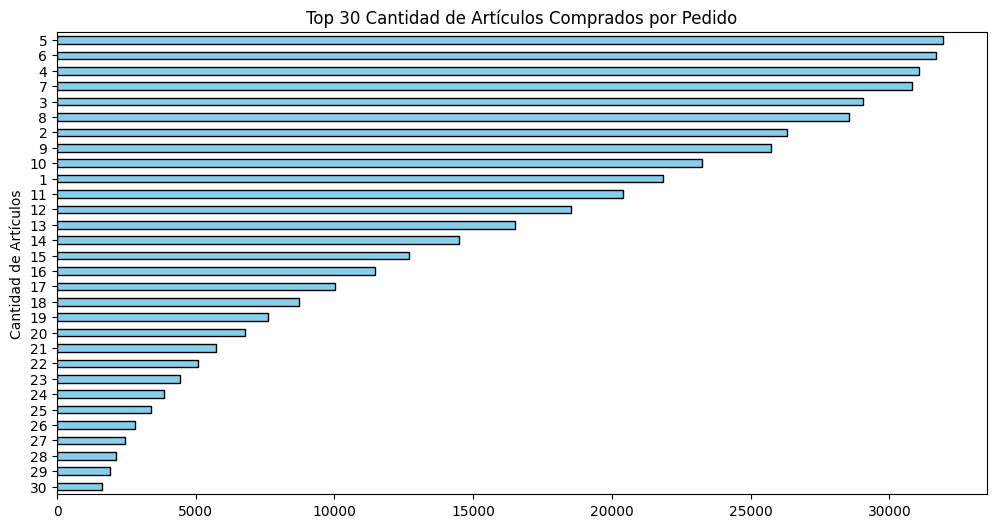

In [54]:
prod_amount = order_products.groupby("order_id")["product_id"].count().reset_index()
prod_amount.columns =["order_id", "q_prod"]

prod_amount.hist(column="q_prod", bins=35, color='skyblue', edgecolor='black')


plt.title('Distribución de la Cantidad de Artículos Comprados por Pedido')
plt.xlabel('Cantidad de Artículos')
plt.ylabel('Nro de Pedidos')

plt.show()

prod_amount_recap = prod_amount.groupby("q_prod")["order_id"].count().sort_values(ascending=False).head(30)

prod_amount_recap.sort_values().plot(kind='barh', title='Top 30 Cantidad de Artículos Comprados por Pedido', x="q_prod",
        xlabel='Cantidad de Artículos',
        rot=0,
        figsize=(12, 6),
        color='skyblue', 
        edgecolor='black'
                                                                 
)
plt.show()


Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">

**Macarena :** 
El histograma muestra que la mayoría de los pedidos incluyen entre 1 y 10 artículos, con una frecuencia notablemente alta en los valores más bajos. El gráfico muestra que la mayoría de los pedidos se agrupan alrededor de las 5 a 7 unidades, y a medida que la frecuencia decrece de manera gradual los artículos en el pedido aumenta, con menos pedidos que incluyen una cantidad significativamente mayor de artículos(correlación negativa).
El análisis nos da insights de los hábitos de compra de los clientes, indicando que la mayoría prefiere realizar pedidos con una cantidad moderada de artículos en lugar de grandes compras.    

    
</div>


### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

los 20 productos que se vuelven a pedir con mayor frecuencia son:

product_id  product_name            
24852       BANANA                      55763
13176       BAG OF ORGANIC BANANAS      44450
21137       ORGANIC STRAWBERRIES        28639
21903       ORGANIC BABY SPINACH        26233
47209       ORGANIC HASS AVOCADO        23629
47766       ORGANIC AVOCADO             18743
27845       ORGANIC WHOLE MILK          16251
47626       LARGE LEMON                 15044
27966       ORGANIC RASPBERRIES         14748
16797       STRAWBERRIES                13945
26209       LIMES                       13327
22935       ORGANIC YELLOW ONION        11145
24964       ORGANIC GARLIC              10411
45007       ORGANIC ZUCCHINI            10076
49683       CUCUMBER KIRBY               9538
28204       ORGANIC FUJI APPLE           8989
8277        APPLE HONEYCRISP ORGANIC     8836
39275       ORGANIC BLUEBERRIES          8799
5876        ORGANIC LEMON                8412
49235       ORGANIC HA

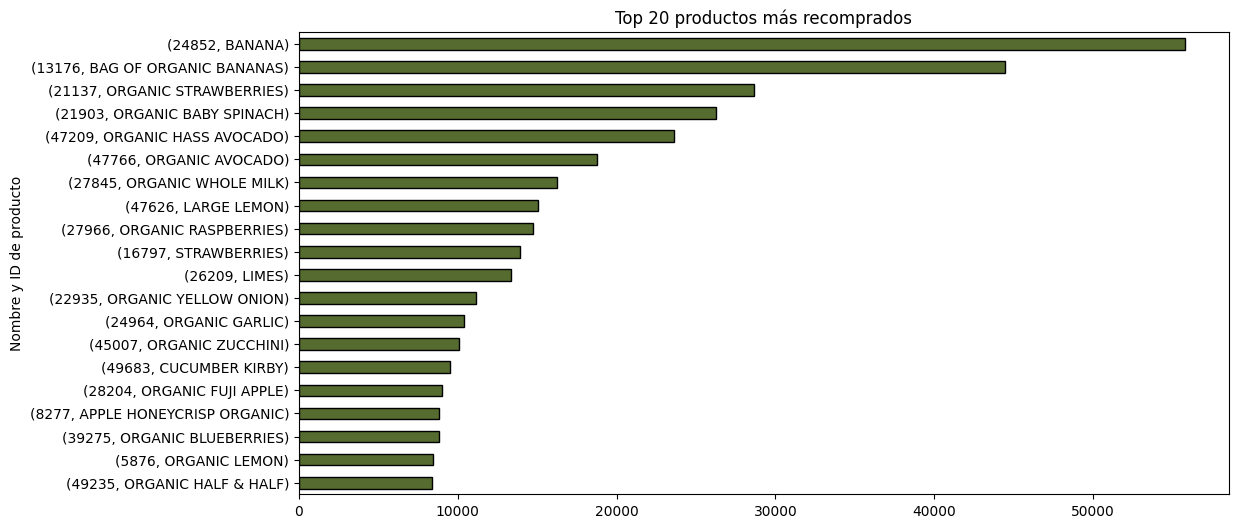

In [55]:
product_reordered_ranking = grp["reordered"].sum().sort_values(ascending=False)
print("los 20 productos que se vuelven a pedir con mayor frecuencia son:")
print()

print(product_reordered_ranking.head(20))

top_reordered_20 = product_reordered_ranking.head(20)
top_reordered_20.sort_values().plot(kind='barh', title='Top 20 productos más recomprados', x="product_name",
        xlabel='Nombre y ID de producto',
        rot=0,
        figsize=(12, 6),
        color='darkolivegreen', 
        edgecolor='black'
                                                                 
)
plt.show()


Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">

**Macarena :** 
    
Al igual que los resultados sobre las preferencias de los consumidores mostradas en el punto 7.7, en los productos con más frecuencia de recompra sigue la preferencia en frutas y verduras, especialmente en los orgánicos y las bananas. 
    
</div>


### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [56]:
#Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?

ranking_merge = pd.merge(product_ranking, product_reordered_ranking, on=["product_id", "product_name"] )
ranking_merge.info()
print(ranking_merge.head())
ranking_merge["tasa_repeticion"] = ranking_merge["reordered"] / ranking_merge["order_id"]

print(ranking_merge.head())



<class 'pandas.core.frame.DataFrame'>
MultiIndex: 45573 entries, (24852, 'BANANA') to (41403, 'EXTRA RICH & THICK SPAGHETTI SAUCE SPICES & SEASONINGS')
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   order_id   45573 non-null  int64
 1   reordered  45573 non-null  int64
dtypes: int64(2)
memory usage: 3.7+ MB
                                   order_id  reordered
product_id product_name                               
24852      BANANA                     66050      55763
13176      BAG OF ORGANIC BANANAS     53297      44450
21137      ORGANIC STRAWBERRIES       37039      28639
21903      ORGANIC BABY SPINACH       33971      26233
47209      ORGANIC HASS AVOCADO       29773      23629
                                   order_id  reordered  tasa_repeticion
product_id product_name                                                
24852      BANANA                     66050      55763         0.844254
13176      BAG OF ORGANI

Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">

**Macarena :** 
Se puede visualizar que la tasa de repetición está positivamente relacionada con los productos populares, esto podría ser un reflejo de una alta satisfacción en los clientes de Instacart por este tipo de productos, lo que se podría investigar con mayor profundidad para entender si esto corresponde a una posible ventaja competitiva que posee Instacart, frente a otras empresas o posee otras razones de ser.
    
</div>



### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

         product_id  reordered
user_id                       
2                26          1
4                 2          0
5                12          8
6                 4          0
7                14         13
...             ...        ...
206203           27          6
206206           21         15
206207           46         41
206208          125         87
206209           25          8

[149626 rows x 2 columns]
         product_id  reordered  tasa_repeticion
user_id                                        
2                26          1         0.038462
4                 2          0         0.000000
5                12          8         0.666667
6                 4          0         0.000000
7                14         13         0.928571
...             ...        ...              ...
206203           27          6         0.222222
206206           21         15         0.714286
206207           46         41         0.891304
206208          125         87         0.6

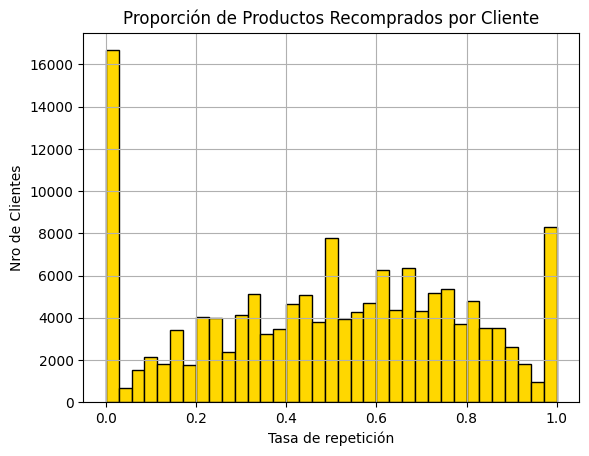

In [57]:
#Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? 
#Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.

orders_merged = instacart_orders.merge(order_products, on="order_id")
user_tot_prod = orders_merged.groupby("user_id")["product_id"].count()
user_reordered_prod = orders_merged.groupby("user_id")["reordered"].sum()
user_concat = pd.concat([user_tot_prod, user_reordered_prod], axis="columns")
print(user_concat)
user_concat["tasa_repeticion"] = user_concat["reordered"] / user_concat["product_id"]
print(user_concat) 

user_concat.hist(column="tasa_repeticion", bins=35, color='gold', edgecolor='black')
plt.title('Proporción de Productos Recomprados por Cliente')
plt.xlabel('Tasa de repetición')
plt.ylabel('Nro de Clientes')

plt.show()

Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">

**Macarena :**    
Se puede visualizar con el gráfico una notoria variabilidad en la tasa de repetición entre los diferentes clientes, aunque se tienen dos tipos más notorios, los clientes con tasa de repetición alta(cercana al 1), los cuales tienen más probabilidad de tener un patrón de compra más consistente, al tener una mayor proporción de productos repetidos. Por otro lado, están los clientes con tasa de repetición baja(cercana al 0), que podrían ser nuevos clientes o estar probando nuevos productos con mayor frecuencia.
    
</div>



### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

los 20 productos que con mayor frecuencia se agregan primero en el carrito de compra:

product_id  product_name               
24852       BANANA                         15562
13176       BAG OF ORGANIC BANANAS         11026
27845       ORGANIC WHOLE MILK              4363
21137       ORGANIC STRAWBERRIES            3946
47209       ORGANIC HASS AVOCADO            3390
21903       ORGANIC BABY SPINACH            3336
47766       ORGANIC AVOCADO                 3044
19660       SPRING WATER                    2336
16797       STRAWBERRIES                    2308
27966       ORGANIC RASPBERRIES             2024
44632       SPARKLING WATER GRAPEFRUIT      1914
49235       ORGANIC HALF & HALF             1797
47626       LARGE LEMON                     1737
196         SODA                            1733
38689       ORGANIC REDUCED FAT MILK        1397
26209       LIMES                           1370
12341       HASS AVOCADOS                   1340
5785        ORGANIC REDUCED FAT 2% MILK 

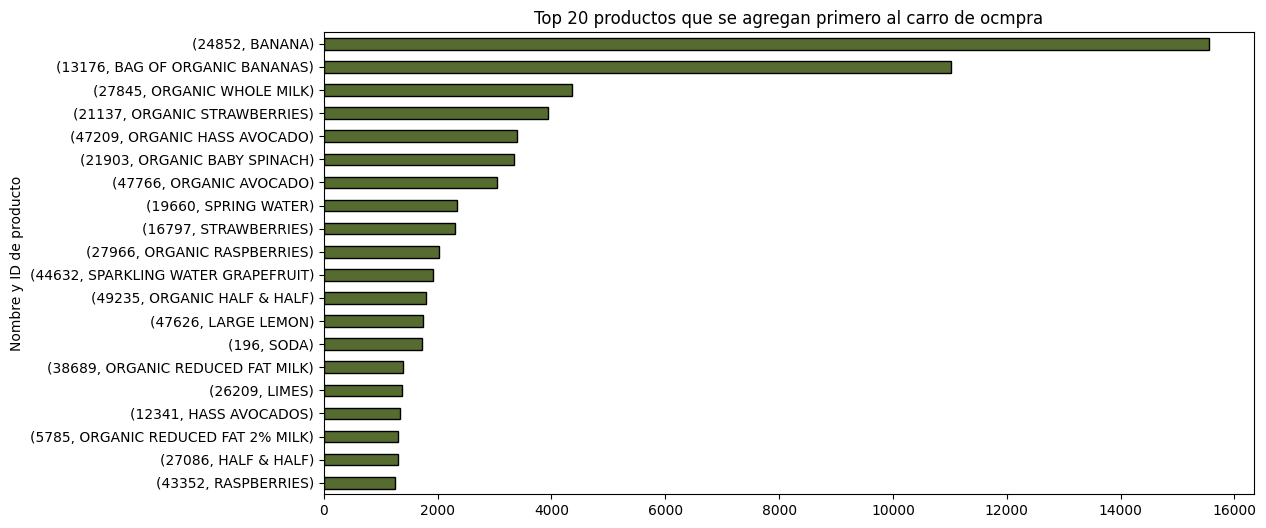

In [58]:
#¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos
#(muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

product_merged_no_1 = product_merged[product_merged["add_to_cart_order"] == 1]

grp_no_1 = product_merged_no_1.groupby(['product_id', 'product_name'])
product_ranking_no_1 = grp_no_1["order_id"].count().sort_values(ascending=False)

print("los 20 productos que con mayor frecuencia se agregan primero en el carrito de compra:")
print()
print(product_ranking_no_1.head(20))

top_n1_20 = product_ranking_no_1.head(20)
top_n1_20.sort_values().plot(kind='barh', title='Top 20 productos que se agregan primero al carro de ocmpra', x="product_name",
        xlabel='Nombre y ID de producto',
        rot=0,
        figsize=(12, 6),
        color='darkolivegreen', 
        edgecolor='black'
                                                                 
)
plt.show()

Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">

**Macarena :** 
Acá se puede ver la que las frutas y verduras se siguen posicionando alto en el ranking, algo que ya se ve venir por su popularidad como producto en general, la sorpresa es ver más bebestibles dentro del ranking, lo que podría ocasionarse por diversos factores, como el ser un tipo de producto de alta preferencia para los clientes que compran solo un producto, por la manera en que los productos se presentan en la aplicación (puede ser que por default aparezcan los bebestibles primero), etc..
    
</div>



## Conclusion general del proyecto:

<div class="alert alert-block alert-info">

**Macarena :** 
    
Conclusión General

Instacart es una plataforma de entregas de alimentos similar a Rappi o Uber Eats. El análisis del conjunto de datos proporcionado se realizó en tres etapas principales:

1. Descripción de los datos: en este paso se importaron las librerías necesarias para la generación del proyecto y es agregaron las tablas con la función read_csv, ajustándola para tomar como delimitador " ; ". Se obtuvo un resumen de los data frames a analizar mediante las funciones info y head, y así entender mejor su conformación y los tipos de datos que las componen.

2. Preprocesamiento de los datos: Se abordaron varios problemas durante el preprocesamiento:

    - Se identificaron y eliminaron duplicados en el DataFrame instacart_orders, encontrando un patrón común relacionado con el día y la hora de generación de las órdenes.

    - Se detectaron valores ausentes en la columna days_since_prior_order, que correspondían a pedidos realizados por nuevos clientes sin historial de compras anteriores.

    - En la tabla products, no se encontraron filas duplicadas, pero sí se identificaron duplicados en la columna product_name, los cuales fueron reemplazados por el string "Unknown".

    - En los DataFrames departments, aisles y order_products no se hallaron filas duplicadas, aunque en order_products las columnas no contenían valores únicos, resultando en duplicados en todas las columnas.

    
3. Análisis de los datos: En esta última parte se realizaron diversos análisis para obtener una mejor comprensión del comportamiento de compra de los clientes y a la vez poder visualizar acertadamente las tendencias generales presentes en los datos, con el fin de generar insights que ayuden a la toma de decisiones estratégicas dentro la compañía.
Los hallazgos principales fueron:
    - El lunes y el domingo son los días con mayor frecuencia de venta, con respecto al rango horario en el que se generan más órdenes, este es entre las 10 am y las 4 pm, con variaciones leves según sea el día en que se genera la venta.

    - El tiempo transcurrido hasta que se genera una recompra suele ser dentro de plazos cortos, con tendencia a realizarse en el trascurso de pasada una semana. Posterior a esto, la frecuencia de recompra empieza a disminuir con el paso de los días.

    - Respecto a la distribución de la cantidad de artículos por pedido, la mayoría de los pedidos incluyen entre 1 y 10 artículos, con un pico notable en los valores más bajos, particularmente entre 5 y 7 artículos, y a medida que el número de artículos por pedido aumenta, la frecuencia de tales pedidos disminuye. Esto indica que los clientes tienden a realizar pedidos con una cantidad moderada de artículos en lugar de hacer grandes compras. Esto puede reflejar una preferencia por la compra frecuente de cantidades más pequeñas y manejables de productos.

    - Los artículos favoritos por los clientes, que primero ponen en sus carros y a la vez tienen una mayor frecuencia de recompra son principalmente frutas y verduras, con un énfasis en productos orgánicos, lo que refleja una clara preferencia por productos frescos y saludables.

    - Se tiene una gran variabilidad en la tasa de repetición entre clientes. Algunos clientes tienen tasas cercanas al 1, indicando que la mayoría de sus compras son de productos que ya han pedido antes. Por otro lado, los clientes con tasas cercanas a 0 pueden estar explorando nuevos productos o son nuevos en la plataforma. Esto sugiere que los clientes tienen patrones de compra muy diversos.

    
</div>


